Example text

In [6]:
data = "example python code"
data

'example python code'

In [7]:
print(data)

example python code


Read data from csv

In [9]:
from pandas import read_csv
filename = 'dataset//consumption_split//CPI_ACPI_COI_RT_A-filtered-2021-03-21.csv'
dataset = read_csv(filename)

In [10]:
dataset.head()

,ref_area.label,indicator.label,source.label,classif1.label,time,obs_value,note_classif.label,note_indicator.label,note_source.label
0,Aruba,"National consumer price index (CPI), annual ra...",ABW - CPS - Consumer Price Survey,COICOP (Selected categories): General,1985,3.72,NaN,NaN,NaN
1,Aruba,"National consumer price index (CPI), annual ra...",ABW - CPS - Consumer Price Survey,COICOP (Selected categories): Food and non-alc...,1985,-0.20,NaN,NaN,NaN
2,Aruba,"National consumer price index (CPI), annual ra...",ABW - CPS - Consumer Price Survey,COICOP (Selected categories): Clothing and foo...,1985,0.79,NaN,NaN,NaN
3,Aruba,"National consumer price index (CPI), annual ra...",ABW - CPS - Consumer Price Survey,"COICOP (Selected categories): Electricity, gas...",1985,6.86,NaN,NaN,NaN
4,Aruba,"National consumer price index (CPI), annual ra...",ABW - CPS - Consumer Price Survey,COICOP (Selected categories): Actual and imput...,1985,2.84,NaN,NaN,NaN


In [12]:
filename = 'dataset//living_index//living_index.csv'
df = read_csv(filename)

In [13]:
byCountry = [dfCountry  for country,dfCountry in df.groupby('Country')]

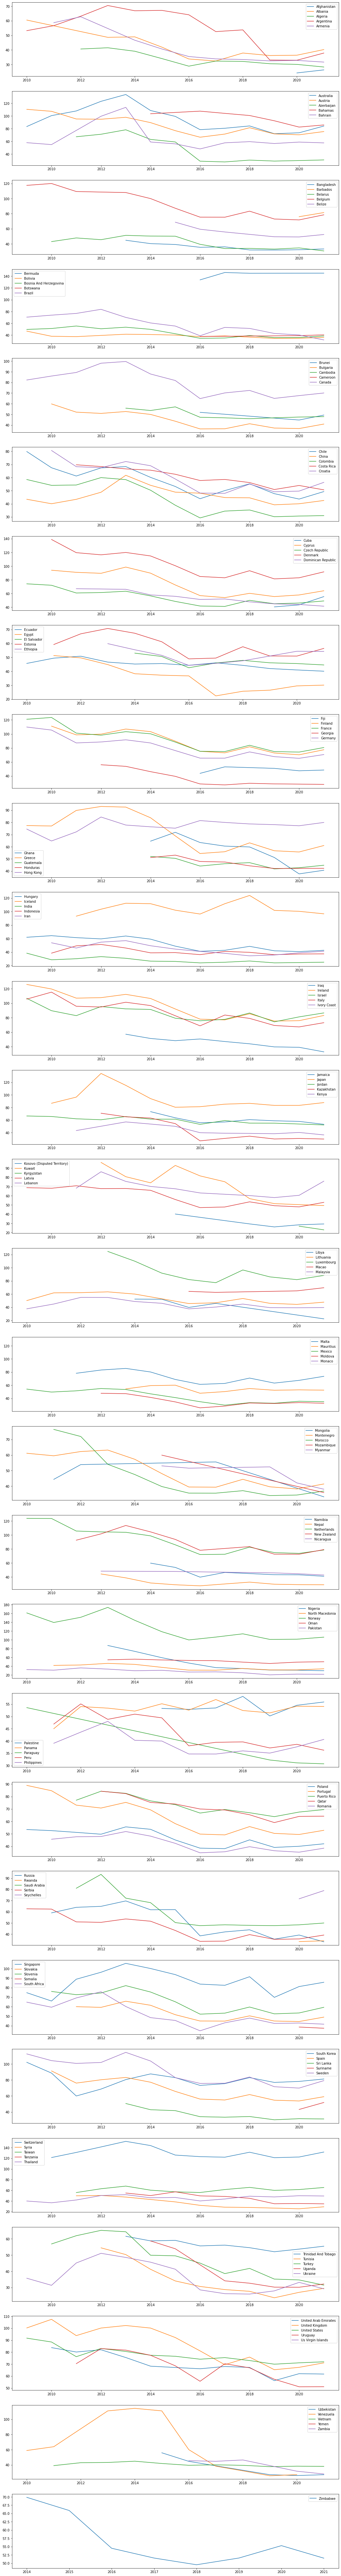

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from math import ceil
countries = [country["Country"].values[0] for country in byCountry]
# print(countries)
plots = int(ceil(len(byCountry)/5))
fig, axs = plt.subplots(plots,figsize=(18, plots*5))
for i in range(0,len(byCountry),5):
    end = min(len(byCountry),i+5)
    for x in range(i,end):
        axs[i//5].plot(byCountry[x]["Year"],byCountry[x]["Cost of Living Index"])
    axs[i//5].legend(countries[i:end])
    
fig.show()

## Fourier tranform

In [29]:
poland_Cost_of_living = df.loc[df['Country'] == "Poland"][["Cost of Living Index","Year"]]

In [30]:
years=poland_Cost_of_living.values[:,1]
cost_of_living_index=poland_Cost_of_living.values[:,0]

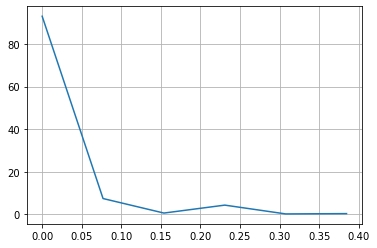

In [31]:
from scipy.fft import fft, fftfreq
# Number of sample points
N = cost_of_living_index.size
# sample spacing
T = 1
yf = fft(cost_of_living_index)
xf = fftfreq(N, T)[:N//2]
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

## Linear regression

In [32]:
x=poland_Cost_of_living.values[:,1]
y=poland_Cost_of_living.values[:,0]
predict_x = [x for x in range(2009,2026)]

In [33]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [34]:
model = LinearRegression(n_jobs = -1)
model.fit(np.reshape(x,(-1,1)), y)
predicted_y = model.predict(np.reshape(predict_x,(-1,1)))

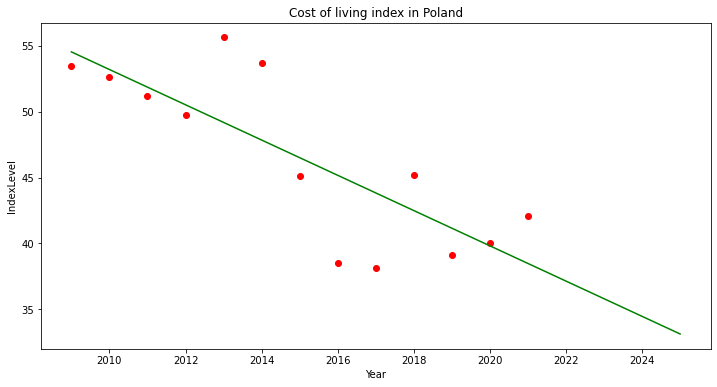

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.scatter(x, y, color = "red")
plt.plot(predict_x, predicted_y, color = "green")
plt.title("Cost of living index in Poland")
plt.xlabel("Year")
plt.ylabel("IndexLevel")
plt.show()

In [15]:
#ToDo regresja wielomianowa